## Observations and Insights 

In [ ]:
%matplotlib notebook

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

merged_pharma_data = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how = "left")
# Display the data table for preview
merged_pharma_data.tail()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30
1892,b879,45,72.555239,2,Stelasyn,Female,4,26


In [15]:
# Checking the number of mice.
merged_pharma_data["Mouse ID"].count()

1893

In [17]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
drop_duplicate_mouse = merged_pharma_data.loc[merged_pharma_data.duplicated(subset=["Mouse ID", "Timepoint",]),"Mouse ID"].unique()


['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = pd.DataFrame{[]}

cleaned_df.head()

In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count=clean_df["Mouse ID"].count()

## Summary Statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_gb = merged_pharma_data.groupby(["Drug Regimen"])

regimen_mean = regimen_gb["Tumor Volume (mm3)"].mean()
regimen_median = regimen_gb["Tumor Volume (mm3)"].median()
regimen_variance = regimen_gb["Tumor Volume (mm3)"].var()
regimen_stdev = regimen_gb["Tumor Volume (mm3)"].std()
regimen_SEM = regimen_gb["Tumor Volume (mm3)"].sem()
# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimen_summary_table = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance": regimen_variance,
                                     "Standard Dev": regimen_stdev, "SEM": regimen_SEM})

regimen_summary_table


,Mean,Median,Variance,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

## Bar and Pie Charts

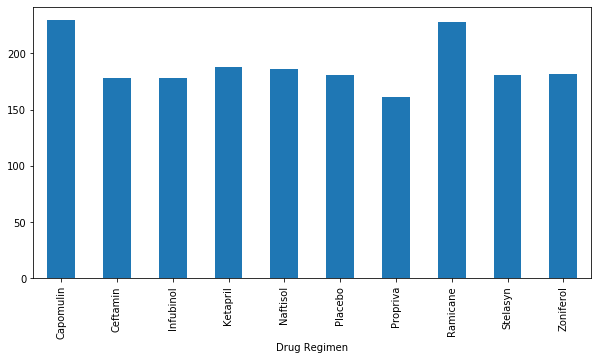

In [7]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
regimen_datapoints = merged_pharma_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
regimen_datapoints

regimen_datapoints.plot(kind = "bar", figsize=(10,5))



Text(0, 0.5, 'Mice Tested')

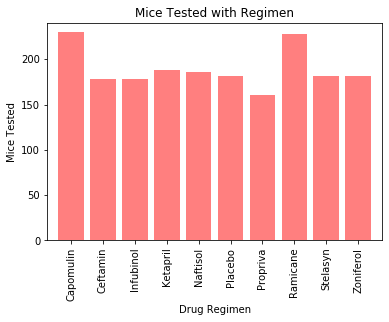

In [19]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mice_count = [230,178,178,188,186,181,161,228,181,182]

drug_regimen = np.arange(len(regimen_datapoints))

plt.bar(drug_regimen, mice_count, color='r', alpha=0.5, align="center")
drug_tick_locations = [value for value in drug_regimen]
plt.xticks(drug_tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril","Naftisol", "Placebo",
                                 "Propriva","Ramicane","Stelasyn", "Zoniferol"],rotation= "vertical")

plt.xlim(-0.75, len(drug_regimen)-0.25)
plt.ylim(0, max(mice_count)+10)

plt.title("Mice Tested with Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Tested")



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_gb= merged_pharma_data.groupby(["Sex"])
male_count = sex_gb.count("Male")
female_count= sex_gb.count("Female")

labels = ["Male","Female"]
size = [male_count, female_count]
colors= ["lightblue", "lightcoral"]

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

TypeError: count() takes 1 positional argument but 2 were given

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
